In [132]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor']='w'
from matplotlib import animation
from matplotlib import colors
#from numba import njit

# The Forest Fire Problem 
Description - 

A simple model of a forest fire is defined as a two-dimensional cellular automaton on a grid of cells which take one of three states: empty, occupied by a tree, or burning. The automaton evolves according to the following rules which are executed simultaneously for every cell at a given generation.

1) A burning cell turns into an empty cell

2) A cell occupied by a tree becomes a burning cell if any of its eight neighbouring cells are burning

3) A cell occupied by a tree becomes burning with a probabilty f (even if none of its neighbouring cells are burning), as though struck by lightning

4) An empty cell becomes occupied by a tree with probability p.


# Replicating square lattice results

In [133]:
# Displacements from a forest cell to its eight nearest neighbours (for square lattice)
nearest_neighbours = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))   # for square lattice
Empty, Tree, Fire = 0, 1, 2

# Defining forest fire function

def forest_fire(init_forest):
    """Runs one sweep of the forest fire updation conditions on the entire initial forest given to it.
    Returns the final state of the forest after the one sweep."""


    curr_forest = np.zeros((ny, nx))  
    
    # The boundary of the forest is always empty, so we only consider cells, indexed from 1 to nx-2, 1 to ny-2
    # This helps us take care of the boundary conditions
    # Looping over all cells of the forest
    for i in range(1,nx-1): 
        for j in range(1,ny-1):
            # if a cell is empty, occupy it with a tree with prob p
            if init_forest[i,j] == Empty: 
                if np.random.uniform(0,1) <= ptree:
                    curr_forest[i,j] = Tree
            
            # A cell can catch fire in 2 cases - Fire in neighbourhood and lightning
            
            # Case 1 - fire in the neighbourhood
            
            if init_forest[i,j] == Tree:    # If a cell already has a tree, 
                curr_forest[i,j] = Tree     # keep it a tree
                for dx,dy in nearest_neighbours:
                    # Checking for fire in neighbourhood
                    if init_forest[i+dy,j+dx] == Fire: #if a fire is in the neighbourhood
                        curr_forest[i,j] = Fire      # then current forest cell catches fire
                        break                         # break the current update
            
            # Case 2 - lightning strike
                    else:                           
                        if np.random.uniform(0,1) <= plight:     # Implementing lightning condition
                            curr_forest[i,j] = Fire
            
            # If a cell is already on fire, then make it empty
            
            if init_forest[i,j] == Fire:
                curr_forest[i,j] = Empty
                
    return curr_forest       # return the status of the forest at the end of 1 sweep


### Setting probabilities and plotting initial forest condition snapshot

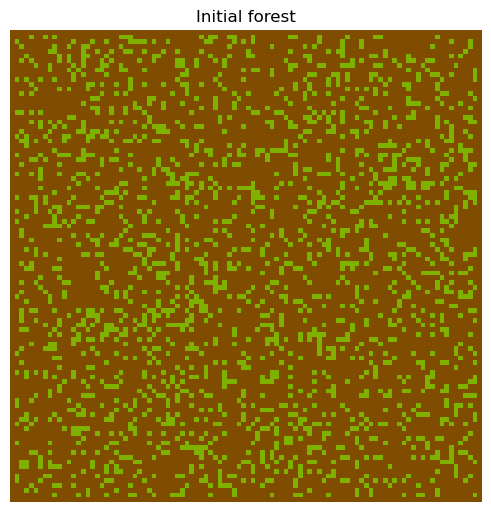

In [134]:
# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
ptree, plight = 0.05, 0.001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100
# Initialize the forest grid.
init_forest = np.zeros((ny, nx))


init_forest[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
init_forest[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction


colors_list = [(0.5,0.3,0), (0.5,0.7,0), (1,0.34,0)]
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
plt.title("Initial forest")
im = ax.imshow(init_forest, cmap=cmap, norm=norm)#, interpolation='nearest'

### Running through forest algorithm for 100 sweeps

In [135]:
%%time


for i in range(100):
    init_forest = forest_fire(init_forest)

Wall time: 8.02 s


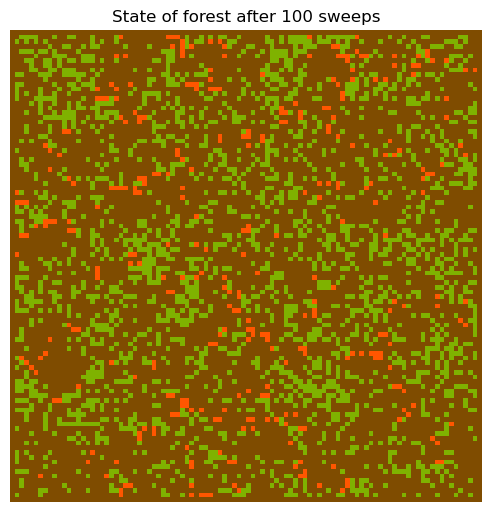

In [136]:
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
plt.imshow(init_forest, cmap=cmap, norm=norm)
plt.title("State of forest after 100 sweeps")
plt.show()

So the forest_fire algorithm seems to work for square lattice, since we can see the fire spreading out. I have not been able to animate the dynamics of this forest fire in time, so I will try to do that later. I'm showing snapshots of the forest after 100 sweeps above.

Now doing for hexagonal lattice

# Creating hexagonal lattice

In [137]:
def init_pos(Lx, Ly, Nx, Ny):

    '''
    Assign the initial positions of the particles on a regular lattice
    
    Parameters:
    -----------
    • Lx   : x-length of the lattice
    • Ly   : y-length of the lattice
    • Nx   : An integer number of particles in the x-direction
    • Ny   : An integer number of particles in the y-direction
    
    Returns:
    --------
    The function returns one value:
    • ipos : A numpy array of (N x 2) elements storing the x and y coordinates of N = Nx * Ny particles.
    '''

    N = Nx*Ny                                       # Total number of particles in the lattice
    
    dx = Lx/Nx                                      # Spacing between particles along the  
    dy = Ly/Ny                                      # x and y axes
    
    ipos = np.zeros((N,2))                          # Empty array to store positions

    n=0                                             # Counter to count the number of particles
    
    for x in range(Nx):                             # Loop over all particles
        for y in range(0,Ny,2):
            ipos[n] = [dx/2 + dx*x, dy/2 + dy*y]    # Assign positions to each particle
            n+=1
        for y in range(1,Ny,2):
            ipos[n] = [dx + dx*x, dy/2 + dy*y]
            n+=1                                    # Increment counter
            
    return ipos

In [138]:
Lx = 10
Ly = (np.sqrt(3)*Lx/2)
Nx = 10
Ny = 10

x = init_pos(Lx, Ly, Nx, Ny)[:,0]
y = init_pos(Lx, Ly, Nx, Ny)[:,1]

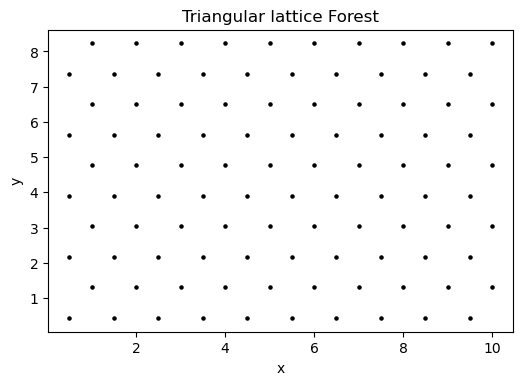

In [139]:
plt.scatter(x, y, color='black', s=5)
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim(-0.5,10.5)
#plt.ylim(-0.5,9)
plt.title("Triangular lattice Forest")
plt.show()

From the above diagram we can figure out the 6 nearest neigbours in this lattice

In [140]:
# Nearest neighbours for hexagonal lattice
nearest_neighbours = ((0,-1), (0,1), (1,0), (-1,0), (1,-1), (-1,-1))

# (These work for this lattice since hexagonal lattice is just like a square lattice 
# with alternate rows shifted to the right or left with half the inter-point distance )

### Again setting up probabilities and initial forest

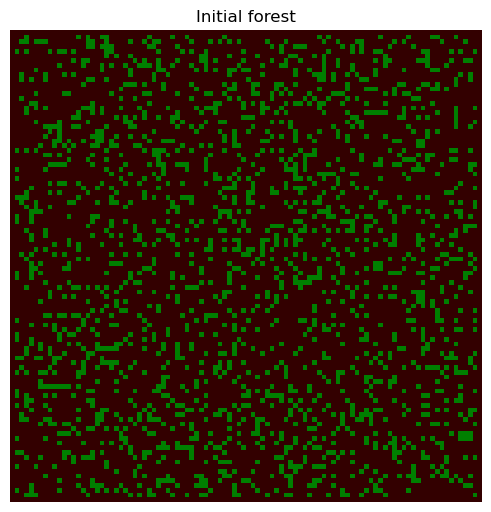

In [141]:
# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
ptree, plight = 0.1, 0.0001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

# Initialize the forest grid.
init_forest = np.zeros((ny, nx))
init_forest[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
init_forest[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

# Color map setting
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


# Plotting

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
plt.title("Initial forest")
im = ax.imshow(init_forest, cmap=cmap, norm=norm)#, interpolation='nearest'

### Again, plotting snapshots of the forest state at different timesteps (sweeps)  

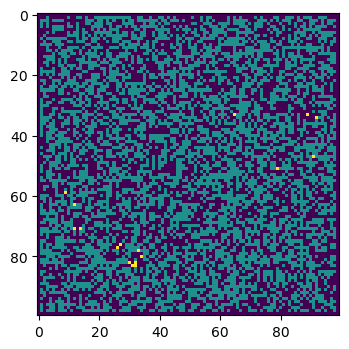

Wall time: 553 ms


In [142]:
%%time

for i in range(5):
    init_forest = forest_fire(init_forest)

plt.imshow(init_forest)
plt.show()

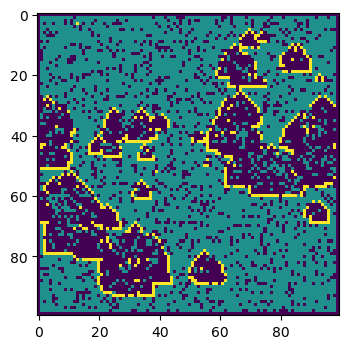

Wall time: 1.49 s


In [143]:
%%time

for i in range(10):
    init_forest = forest_fire(init_forest)
    
plt.imshow(init_forest)
plt.show()

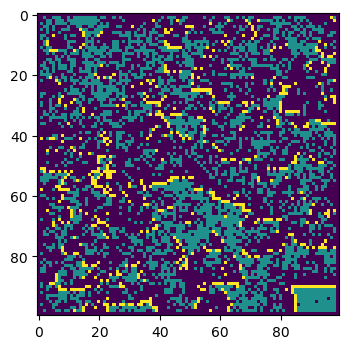

Wall time: 2 s


In [144]:
%%time

for i in range(20):
    init_forest = forest_fire(init_forest)

plt.imshow(init_forest)
plt.show()

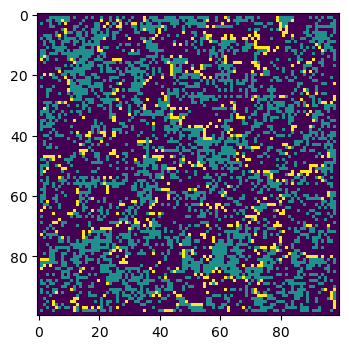

Wall time: 4.12 s


In [145]:
%%time

for i in range(50):
    init_forest = forest_fire(init_forest)

plt.imshow(init_forest)
plt.show()

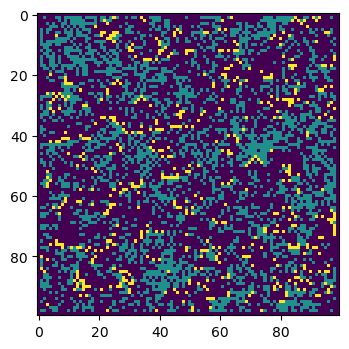

Wall time: 8.38 s


In [146]:
%%time

for i in range(100):
    init_forest = forest_fire(init_forest)

plt.imshow(init_forest)
plt.show()

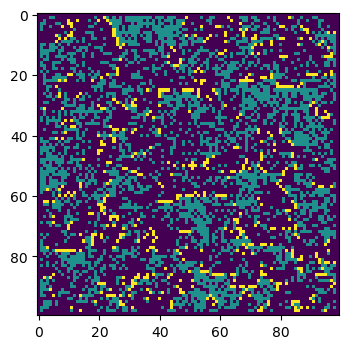

Wall time: 16.4 s


In [147]:
%%time

for i in range(200):
    init_forest = forest_fire(init_forest)

plt.imshow(init_forest)
plt.show()